In [1]:
#get the probabilities

In [2]:
import pandas as pd
import os
import re
from nltk.stem.porter import *
import math

In [3]:
data = pd.read_csv("Reviews_8000.csv")
numberOfReviews = 6400

In [4]:
def getNgrams(text, n):
    if n == 1:
        return text
    
    text.append("<end>")
    ngramList = []
    for i in range(len(text) - (n-1)):
        ngram = text[i:i+n]
        ngramList.append(ngram)
    
    return ngramList

In [5]:
unigramDict = {}
bigramDict = {}
stemmer = PorterStemmer()

def getCountsinRow(row):
    text = row["text"]
    parsedText = re.findall("(\w+)", text)
    
    for index in range(len(parsedText)):
        parsedText[index] = stemmer.stem(parsedText[index])
        parsedText[index] = parsedText[index].lower()
        
    unigram = getNgrams(parsedText, 1)
    bigram = getNgrams(parsedText, 2)
    ngrams = (unigram,bigram)
    for index in range(len(ngrams)):
        for eachWord in ngrams[index]:
            
            if eachWord != "br":
                if index == 0:
                    #unigram

                    if eachWord in unigramDict:
                        unigramDict[eachWord] +=1
                    else:
                        unigramDict[eachWord] =1

                if index == 1:
                    #bigram
                        eachWord = tuple(eachWord)
                        if eachWord in bigramDict:
                            bigramDict[eachWord] +=1
                        else:
                            bigramDict[eachWord] =1

            

In [6]:

#get the probabilies into unigramsDict and bigramsDict
data.apply(getCountsinRow, axis = 1)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
6370    None
6371    None
6372    None
6373    None
6374    None
6375    None
6376    None
6377    None
6378    None
6379    None
6380    None
6381    None
6382    None
6383    None
6384    None
6385    None
6386    None
6387    None
6388    None
6389    None
6390    None
6391    None
6392    None
6393    None
6394    None
6395    None
6396    None
6397    None
6398    None
6399    None
Length: 6400, dtype: object

# UNIGRAM VECTOR MODEL

In [7]:
#get the vector model in data
unigramVM = []
def getUnigramReviewVectors(row):
    
    #we have data,unigrams,bigrams
    rowVector = {}
    text = row["text"]
    score = row["score"]
    parsedText = re.findall("(\w+)", text)
    for index in range(len(parsedText)):
        parsedText[index] = stemmer.stem(parsedText[index])
        parsedText[index] = parsedText[index].lower()
        if parsedText[index] != "br":
            if parsedText[index] in rowVector:
                rowVector[parsedText[index]] +=1
            else:
                rowVector[parsedText[index]] = 1

    if score >= 4:
        rowVector["<label>"] = "good"
    elif score < 3:
        rowVector["<label>"] = "bad"
        
    unigramVM.append(rowVector)
    

data.apply(getUnigramReviewVectors, axis = 1)
    
    
    

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
6370    None
6371    None
6372    None
6373    None
6374    None
6375    None
6376    None
6377    None
6378    None
6379    None
6380    None
6381    None
6382    None
6383    None
6384    None
6385    None
6386    None
6387    None
6388    None
6389    None
6390    None
6391    None
6392    None
6393    None
6394    None
6395    None
6396    None
6397    None
6398    None
6399    None
Length: 6400, dtype: object

In [8]:
DF_to_unigramVM = pd.DataFrame(unigramVM)

# GET TFIDF UNIGRAM MODEL

In [9]:
#make inverted index
invertedIndex = {}
'''
invertedIndex
the => {index : 1}
'''

def makeInvertedIndex(row):
    #get the bigrams
    #for each bigram -> add a count to the inverted index
    #do not double count
    
    #get bigrams
    text = row["text"]
    parsedText = re.findall("(\w+)", text)
    
    for index in range(len(parsedText)):
        
        parsedText[index] = stemmer.stem(parsedText[index])
        parsedText[index] = parsedText[index].lower()
        eachWord = parsedText[index]
    
        if eachWord not in invertedIndex:
            invertedIndex[eachWord] = [1, {}]

        if row.name not in invertedIndex[eachWord]:
            invertedIndex[eachWord][0] += 1
            invertedIndex[eachWord][1][row.name] = 1

In [10]:
data.apply(makeInvertedIndex, axis = 1)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
6370    None
6371    None
6372    None
6373    None
6374    None
6375    None
6376    None
6377    None
6378    None
6379    None
6380    None
6381    None
6382    None
6383    None
6384    None
6385    None
6386    None
6387    None
6388    None
6389    None
6390    None
6391    None
6392    None
6393    None
6394    None
6395    None
6396    None
6397    None
6398    None
6399    None
Length: 6400, dtype: object

In [11]:
TFIDFVM = []
def getTFIDFReviewVectors(row):
    
    #we have data,unigrams,bigrams
    rowVector = {}
    text = row["text"]
    score = row["score"]
    parsedText = re.findall("(\w+)", text)
    
    for index in range(len(parsedText)):
        parsedText[index] = stemmer.stem(parsedText[index])
        parsedText[index] = parsedText[index].lower()
        
        if parsedText[index] != "br":
            if parsedText[index] in rowVector:
                rowVector[parsedText[index]] +=1
            else:
                rowVector[parsedText[index]] = 1

    #get individual counts
    for eachWord in rowVector:
        
        TF = rowVector[eachWord]/unigramDict[eachWord]
        
        term = len(invertedIndex[eachWord][1])
        
        
        if term == 0:
            term = 1
            
        IDF = math.log2(numberOfReviews/term)
            
        if IDF < 0:
            print(eachWord)
            
        rowVector[eachWord] = TF*IDF
            
        
    if score >= 4:
        rowVector["<label>"] = "good"
    elif score < 3:
        rowVector["<label>"] = "bad"
        
    TFIDFVM.append(rowVector)
    



In [12]:

data.apply(getTFIDFReviewVectors, axis = 1)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
6370    None
6371    None
6372    None
6373    None
6374    None
6375    None
6376    None
6377    None
6378    None
6379    None
6380    None
6381    None
6382    None
6383    None
6384    None
6385    None
6386    None
6387    None
6388    None
6389    None
6390    None
6391    None
6392    None
6393    None
6394    None
6395    None
6396    None
6397    None
6398    None
6399    None
Length: 6400, dtype: object

In [13]:
DF_for_TFIDFVM = pd.DataFrame(TFIDFVM)

# Logistic Regression

## Unigram

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets
import numpy as np
from sklearn.metrics import accuracy_score as Accuracy
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold

In [15]:
datadf = DF_to_unigramVM
datadf = datadf.fillna(0)
X, Y = datadf.drop(columns = "<label>").values, datadf["<label>"].values

In [16]:
#niave training with count vectors
acc = []
kf = KFold(n_splits = 10)
for trainIndex, testIndex in kf.split(X):
    trainX, testX, trainY, testY = X[trainIndex], X[testIndex], Y[trainIndex], Y[testIndex]
    nb = LogisticRegression(solver='liblinear')
    nb.fit(trainX, trainY)
    predictions = nb.predict(testX)
    acc.append(Accuracy(testY, predictions))

Average accuracy of predictions 0.84609375


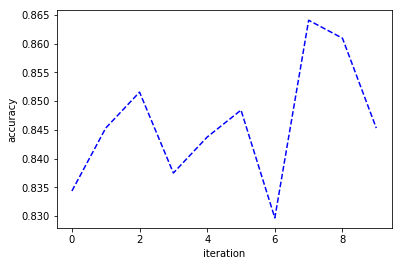

In [17]:
print("Average accuracy of predictions " + str(np.mean(acc)))
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.plot(acc, 'b--')
plt.show()

In [18]:
confusion_matrix(testY, predictions).ravel()


array([280,  63,  36, 261])

In [19]:
print(classification_report(testY, predictions))

              precision    recall  f1-score   support

         bad       0.89      0.82      0.85       343
        good       0.81      0.88      0.84       297

   micro avg       0.85      0.85      0.85       640
   macro avg       0.85      0.85      0.85       640
weighted avg       0.85      0.85      0.85       640



## UnigramTFIDF

In [20]:
datadf = DF_for_TFIDFVM
datadf = datadf.fillna(0)
X, Y = datadf.drop(columns = "<label>").values, datadf["<label>"].values

In [21]:
#logistic training with tf-idf vectors
acc = []
kf = KFold(n_splits = 10)
for trainIndex, testIndex in kf.split(X):
    trainX, testX, trainY, testY = X[trainIndex], X[testIndex], Y[trainIndex], Y[testIndex]
    nb = LogisticRegression(solver='liblinear')
    nb.fit(trainX, trainY)
    predictions = nb.predict(testX)
    acc.append(Accuracy(testY, predictions))

Average accuracy of predictions 0.6767187499999999


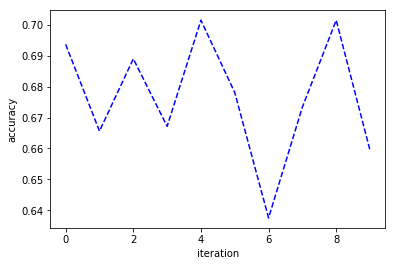

In [22]:
print("Average accuracy of predictions " + str(np.mean(acc)))
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.plot(acc, 'b--')
plt.show()

In [23]:
confusion_matrix(testY, predictions)

array([[193, 150],
       [ 68, 229]])

In [24]:
print(classification_report(testY, predictions))

              precision    recall  f1-score   support

         bad       0.74      0.56      0.64       343
        good       0.60      0.77      0.68       297

   micro avg       0.66      0.66      0.66       640
   macro avg       0.67      0.67      0.66       640
weighted avg       0.68      0.66      0.66       640



# Random Forest

## Unigram

In [25]:
datadf = DF_to_unigramVM
datadf = datadf.fillna(0)
X, Y = datadf.drop(columns = "<label>").values, datadf["<label>"].values

In [26]:
#random forest training with count vectors
acc = []
kf = KFold(n_splits = 10)
for trainIndex, testIndex in kf.split(X):
    trainX, testX, trainY, testY = X[trainIndex], X[testIndex], Y[trainIndex], Y[testIndex]
    rfc = RandomForestClassifier(n_estimators = 10)
    rfc.fit(trainX, trainY)
    predictions = rfc.predict(testX)
    acc.append(Accuracy(testY, predictions))

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
print("Average accuracy of predictions " + str(np.mean(acc)))
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.plot(acc, 'b--')
plt.show()

In [ ]:
print(confusion_matrix(testY, predictions))

In [ ]:
print(classification_report(testY, predictions))

## Unigram TFIDF

In [ ]:
unigramdf =  DF_for_TFIDFVM
unigramdf = unigramdf.fillna(0)
X, Y = unigramdf.drop(columns = "<label>").values, unigramdf["<label>"].values

In [ ]:
#random forest training with tfidf vectors
acc = []
kf = KFold(n_splits = 10)
for trainIndex, testIndex in kf.split(X):
    trainX, testX, trainY, testY = X[trainIndex], X[testIndex], Y[trainIndex], Y[testIndex]
    rfc = RandomForestClassifier(n_estimators = 10)
    rfc.fit(trainX, trainY)
    predictions = rfc.predict(testX)
    acc.append(Accuracy(testY, predictions))

In [ ]:
print("Average accuracy of predictions " + str(np.mean(acc)))
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.plot(acc, 'b--')
plt.show()

In [ ]:
print(confusion_matrix(testY, predictions))

In [ ]:
print(classification_report(testY, predictions))

# Naive Bayes

## Unigram

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets
import numpy as np
from sklearn.metrics import accuracy_score as Accuracy
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold


# In[9]:


datadf =  DF_to_unigramVM
datadf = datadf.fillna(0)
X, Y = datadf.drop(columns = "<label>").values, datadf["<label>"].values


# In[10]:


#niave training with count vectors
acc = []
kf = KFold(n_splits = 10)
for trainIndex, testIndex in kf.split(X):
    trainX, testX, trainY, testY = X[trainIndex], X[testIndex], Y[trainIndex], Y[testIndex]
    nb = MultinomialNB()
    nb.fit(trainX, trainY)
    predictions = nb.predict(testX)
    acc.append(Accuracy(testY, predictions))


# In[11]:


print("Average accuracy of predictions " + str(np.mean(acc)))
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.plot(acc, 'b--')
plt.show()


# In[12]:


print(confusion_matrix(testY, predictions))


# In[13]:


print(classification_report(testY, predictions))

## Unigram TFIDF

In [ ]:

unigramdf = DF_for_TFIDFVM
unigramdf = unigramdf.fillna(0)
X, Y = unigramdf.drop(columns = "<label>").values, unigramdf["<label>"].values


# In[26]:


#niave training with unigram tfIdf vectors
acc = []
kf = KFold(n_splits = 10)
for trainIndex, testIndex in kf.split(X):
    trainX, testX, trainY, testY = X[trainIndex], X[testIndex], Y[trainIndex], Y[testIndex]
    nb = MultinomialNB()
    nb.fit(trainX, trainY)
    predictions = nb.predict(testX)
    acc.append(Accuracy(testY, predictions))


# In[27]:


print("Average accuracy of predictions " + str(np.mean(acc)))
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.plot(acc, 'b--')
plt.show()


# In[17]:


print(confusion_matrix(testY, predictions))


# In[18]:


print(classification_report(testY, predictions))

